<a href="https://colab.research.google.com/github/jason1588/cloud_github/blob/master/Assignment_1_Data_Collection_Protein_Classification_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#I. Handle text file

Download protein sequences as Text file from Uniprot

In [ ]:
!curl 'https://rest.uniprot.org/uniprotkb/stream?download=true&format=txt&query=((keyword:KW-0813)+AND+(existence:1)+AND+(fragment:false)+AND+(reviewed:true))' > transporters.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  186M    0  186M    0     0   794k      0 --:--:--  0:04:00 --:--:--  668k


Import libaries

In [ ]:
import os
import re
import pandas as pd

Now we write a function to read text file (line by line). In each line, we use regular expression (Regex) to check information for each line.

In [ ]:
def text_to_dataframe(file_path):
    inc_list = []
    n = -1
    # Create dataframe
    df = pd.DataFrame(columns=['ID', 'SEQUENCE', 'LENGTH', 'LABEL'])
    # Split protein sequences by '//
    all_data = re.split(r'^\/\/', ''.join(open(file_path).readlines()), flags=re.M)
    for data in all_data[:-1]:
        # If the line begins with AC -> ID
        matches = re.findall(r'^AC   (\w+);', data, flags=re.M)
        fid = matches[0]

        if (not len(inc_list) == 0 and fid not in inc_list):
            continue

        n += 1
        # If the line begins with SQ -> Sequence
        matches = re.split(r'(^SQ   .*)', data, flags=re.M)
        seq = ''.join(matches[2].split())

        # If the line begins with KW -> Keywords
        matches = re.findall(r'^KW   (.*)', data, flags=re.M)
        label = 'TP'
        for match in matches:
            if match.find('Electron transport') != -1:
                label = 'ET'
                break
        df.loc[n] = [fid, seq, len(seq), label]

        print(f"\rReading...\t{n}", end='')

    print('\tDone')
    return df

Reading text file

In [ ]:
df_etc = text_to_dataframe('transporters.txt')

Reading...	13619	Done


Check out the dataset

In [ ]:
df_etc

,ID,SEQUENCE,LENGTH,LABEL
0,A0A061ACU2,MTVPPLLKSCVVKLLLPAALLAAAIIRPSFLSIGYVLLALVSAVLP...,2442,TP
1,A0A072ULZ1,MEENKKTVDGSVDFTEEQEALVVKSWNAMKNNSCDLSLKFFTKILE...,351,TP
2,A0A0B4K7J2,MFTTRKEVDAHVHKMLGKLQPGRERDIKGLAVARLYMKVQEYPKAI...,2718,TP
3,A0A0B7P9G0,MNTYFISFITIIIFANGINGTSVDTSNKLLLQKANDFNLSQNLSSS...,834,TP
4,A0A0D1DWZ5,MSDSIYAPHNKHKLEAARAADAAADDAATVSALVEPTDSTAQASHA...,792,TP
...,...,...,...,...
13615,P9WJY1,MPRVEVGLVIHSRMHARAPVDVWRSVRSLPDFWRLLQVRVASQFGD...,441,TP
13616,P9WPD7,MSIIAITVFVAGYALIASDRVSKTRVALTCAAIMVGAGIVGSDDVF...,428,TP
13617,Q1HPL8,MVQDGNPPDDNVFRAFCNALYNTVDAPVTWFRETVVEPNQKKYPWY...,159,ET
13618,Q8YEE8,MNLKLLSSVAFAATIGFASAAYADITIGVIAPLTGPVAAFGDQVKK...,368,TP


In [ ]:
df_etc_tp

,ID,SEQUENCE,LENGTH,LABEL
0,A0A061ACU2,MTVPPLLKSCVVKLLLPAALLAAAIIRPSFLSIGYVLLALVSAVLP...,2442,TP
1,A0A072ULZ1,MEENKKTVDGSVDFTEEQEALVVKSWNAMKNNSCDLSLKFFTKILE...,351,TP
2,A0A0B4K7J2,MFTTRKEVDAHVHKMLGKLQPGRERDIKGLAVARLYMKVQEYPKAI...,2718,TP
3,A0A0B7P9G0,MNTYFISFITIIIFANGINGTSVDTSNKLLLQKANDFNLSQNLSSS...,834,TP
4,A0A0D1DWZ5,MSDSIYAPHNKHKLEAARAADAAADDAATVSALVEPTDSTAQASHA...,792,TP
...,...,...,...,...
13613,P9WFM5,MSASLDDASVAPLVRKTAAWAWRFLVILAAMVALLWVLNKFEVIVV...,367,TP
13614,P9WJX1,MSGTVVAVPPRVARALDLLNFSLADVRDGLGPYLSIYLLLIHDWDQ...,418,TP
13615,P9WJY1,MPRVEVGLVIHSRMHARAPVDVWRSVRSLPDFWRLLQVRVASQFGD...,441,TP
13616,P9WPD7,MSIIAITVFVAGYALIASDRVSKTRVALTCAAIMVGAGIVGSDDVF...,428,TP


In [ ]:
df_etc_et

,ID,SEQUENCE,LENGTH,LABEL
11,A0A0G4P2K0,MKDMDCIPGPKPLPVVGNLFDLDLDNALQSIIRMADEFGPLFQITI...,1049,ET
25,A0A1D8PHA3,MFRTAYKTMNQSMVQKFIAGGVGVTGLTASYLLYQDSMTADAMTAA...,288,ET
26,A0A1D8PJX3,MSSLAFRTLRNGLGLKSSVRALSTTTTTLSNYQQPDYSSYLNNKSG...,213,ET
88,A4UVI1,MAPDPVAAKTPVQGPTPRYFTWDEVAQRSGCEERWLVIDRKVYDIS...,444,ET
95,A5GZW8,MATLWRLSVLCGARGGGALVLRTSVVRPAHVSAFLQDRHTPGWCGV...,159,ET
...,...,...,...,...
13604,Q9X1X4,MGGTALNEIVKKVKIAEDVFDFWIHSPSVSKEARPGQFVVIRLHEK...,282,ET
13608,Q9ZEE0,MVNNVTDSSFKNEVLESDLPVMVDFWAEWCGPCKMLIPIIDEISKE...,105,ET
13609,Q9ZK53,MGKIGIFFGTDSGNAEAIAEKISKAIGNAEVIDVAKASKEQFNGFT...,164,ET
13617,Q1HPL8,MVQDGNPPDDNVFRAFCNALYNTVDAPVTWFRETVVEPNQKKYPWY...,159,ET


Seperate TP and ET

In [ ]:
df_etc_et['SEQUENCE'][11].count('M')

30

In [ ]:
df_etc_tp = df_etc[df_etc['LABEL'] == 'TP']
df_etc_et = df_etc[df_etc['LABEL'] == 'ET']

Building a data table

In [ ]:
tbl_etc = pd.DataFrame(columns=['Name', 'Number of Protein'])
tbl_etc.loc[0] = ['Transporters', len(df_etc_tp)]
tbl_etc.loc[1] = ['Electron Transporters', len(df_etc_et)]
tbl_etc.loc[2] = ['Total', len(df_etc)]

tbl_etc

,Name,Number of Protein
0,Transporters,11558
1,Electron Transporters,2062
2,Total,13620


Do a simple analysis on our seperated datasets

In [ ]:
aa = ['A','R','N','D','C','Q','E','G','H','I','L','K','M','F','P','S','T','W','Y','V']

In [ ]:
seqs = ''.join([i for i in df_etc_et['SEQUENCE']])

In [ ]:
total = len(seqs)
res = {}
for a in aa:
  res[a] = seqs.count(a)/total*100

In [ ]:
res

{'A': 9.240100954784637,
 'R': 4.370738985848869,
 'N': 3.7223108486710004,
 'D': 4.968173845409018,
 'C': 1.851631388048922,
 'Q': 3.2080128891957744,
 'E': 5.5642197830107065,
 'G': 7.840266038080272,
 'H': 2.5050199607927173,
 'I': 5.658666476185941,
 'L': 9.35081787661611,
 'K': 5.317983761518132,
 'M': 2.8286387771137407,
 'F': 4.671142963721358,
 'P': 5.031667420652872,
 'S': 6.096375310523267,
 'T': 5.589617213108249,
 'W': 1.8028207020802083,
 'Y': 3.4540504932657123,
 'V': 6.905323142614507}

In [ ]:
def count_aa(df):
  all_seqs = [i for i in df['SEQUENCE']]
  all_seqs = ''.join(all_seqs)    # Join all sequences
  res = {}
  for a in aa:
    res[a] = all_seqs.count(a)
  return res

In [ ]:
def percent_aa(df):
  all_seqs = [i for i in df['SEQUENCE']]
  all_seqs = ''.join(all_seqs)    # Join all sequences
  total = all_seqs.count('')
  res = {}
  for a in aa:
    res[a] = all_seqs.count(a)/total*100
  return res

In [ ]:
percent_aa(df_etc_tp).values()

dict_values([7.719367531118815, 4.788510347924023, 4.016812077527869, 4.82248618549122, 1.5636357739336484, 4.034269012319063, 6.122439570069719, 6.6689465614290135, 2.0749268176039672, 5.851427811917904, 10.599078121214086, 5.409662429305773, 2.5150228212060104, 4.638886292077095, 4.707219539556651, 7.630222691980176, 5.603294495628135, 1.328603108161133, 2.9865349478931167, 6.916078250312731])

In [ ]:
chr_etc = pd.DataFrame(columns=['Amino Acid','ET','TP'])
chr_etc['Amino Acid'] = aa
chr_etc['ET'] = percent_aa(df_etc_et).values()
chr_etc['TP'] = percent_aa(df_etc_tp).values()
chr_etc

,Amino Acid,ET,TP
0,A,9.240083,7.719368
1,R,4.370730,4.788510
2,N,3.722303,4.016812
3,D,4.968164,4.822486
4,C,1.851628,1.563636
5,Q,3.208007,4.034269
6,E,5.564209,6.122440
7,G,7.840250,6.668947
8,H,2.505015,2.074927
9,I,5.658655,5.851428


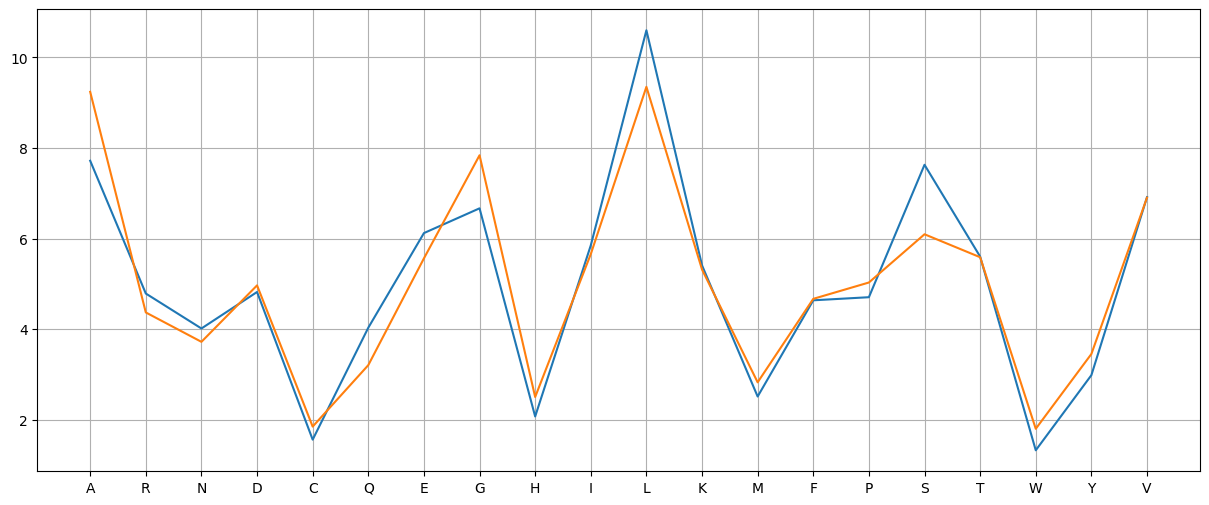

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15,6))
plt.xticks(ticks=range(0,20),labels=aa)
plt.plot(percent_aa(df_etc_tp).values())
plt.plot(percent_aa(df_etc_et).values())
plt.grid()
plt.show()

In [ ]:
def dataframe_to_fasta(df, output_file='fasta.txt'):
    fout = open(output_file, 'w')
    for i in range(len(df)):
        fout.write(
            f">sp|{df.iloc[i,:].ID}|length={df.iloc[i,:].LENGTH}|label={df.iloc[i,:].LABEL}\n{df.iloc[i,:].SEQUENCE}\n")
    fout.close()

In [ ]:
dataframe_to_fasta(df_etc_et,'fasta_et.txt')

#II. Handle JSON file

In [ ]:
!curl 'https://rest.uniprot.org/uniprotkb/stream?download=true&format=json&query=((keyword:KW-0813)+AND+(existence:1)+AND+(fragment:false)+AND+(reviewed:true))' > transporters.json

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  342M    0  342M    0     0  7808k      0 --:--:--  0:00:44 --:--:-- 8022k


In [ ]:
import json

jdata = {}

with open('transporters.json') as f:
    jdata = json.load(f)

In [ ]:
[i['id'] for i in jdata['results'][0]['keywords']]

['KW-0002',
 'KW-0024',
 'KW-0025',
 'KW-1003',
 'KW-0325',
 'KW-0407',
 'KW-0406',
 'KW-0472',
 'KW-1185',
 'KW-0812',
 'KW-1133',
 'KW-0813']

In [ ]:
jdata['results'][0].keys()

dict_keys(['entryType', 'primaryAccession', 'secondaryAccessions', 'uniProtkbId', 'entryAudit', 'annotationScore', 'organism', 'proteinExistence', 'proteinDescription', 'genes', 'comments', 'features', 'keywords', 'references', 'uniProtKBCrossReferences', 'sequence', 'extraAttributes'])

In [ ]:
[i['id'] for i in jdata['results'][0]['uniProtKBCrossReferences']]

['BX284604',
 'BX284604',
 'BX284604',
 'BX284604',
 'BX284604',
 'BX284604',
 'BX284604',
 'BX284604',
 'BX284604',
 'BX284604',
 'BX284604',
 'BX284604',
 'T25030',
 'NP_001255385.2',
 'NP_001255386.2',
 'NP_001255387.2',
 'NP_001255388.2',
 'NP_001255389.2',
 'NP_001255390.2',
 'NP_001255391.2',
 'NP_001293677.1',
 'NP_001293979.1',
 'NP_001293980.1',
 'NP_001293981.1',
 'NP_001293982.1',
 '4PKE',
 '4PKX',
 '4PKE',
 '4PKX',
 'A0A061ACU2',
 'A0A061ACU2',
 '6239.C10C5.1g.1',
 '1.A.75.1.8',
 'A0A061ACU2',
 '6239-T20D3.11b',
 'C10C5.1a.1',
 'C10C5.1b.1',
 'C10C5.1c.1',
 'C10C5.1d.1',
 'C10C5.1e.1',
 'C10C5.1f.1',
 'C10C5.1g.1',
 'C10C5.1h.1',
 'C10C5.1i.1',
 'C10C5.1j.1',
 'C10C5.1k.1',
 'C10C5.1l.1',
 '182492',
 'cel:CELE_C10C5.1',
 'C10C5.1',
 'T20D3.11',
 'WB:WBGene00007505',
 '182492',
 'C10C5.1a',
 'C10C5.1b',
 'C10C5.1c',
 'C10C5.1d',
 'C10C5.1e',
 'C10C5.1f',
 'C10C5.1g',
 'C10C5.1h',
 'C10C5.1i',
 'C10C5.1j',
 'C10C5.1k',
 'C10C5.1l',
 'KOG1893',
 'ENSGT00940000166986',
 'CLU_00

In [ ]:
def json_to_dataframe(json_data):
    inc_list = []
    n = -1
    # Create dataframe
    df = pd.DataFrame(columns=['ID', 'SEQUENCE', 'LENGTH', 'ET/TP', 'COMPLEX'])
    # Split protein sequences by '//

    ETC_KEY = 'KW-0249'
    CP1_KEY = ['GO:0050664','GO:0003954','GO:0016655','GO:0050136','GO:0008137']
    CP2_KEY = ['GO:0000104','GO:0008177']
    CP3_KEY = ['GO:0008121','GO:0045158']
    CP4_KEY = ['GO:0004129']
    CP5_KEY = ['GO:0046961']

    for data in json_data['results']:
        n = n + 1
        # Protein ID
        ID = data['primaryAccession']
        SEQ = data['sequence']['value']
        LEN = data['sequence']['length']
        ETC = 'TP'
        if ETC_KEY in [i['id'] for i in data['keywords']]:
          ETC = 'ET'
        COM = ''
        CRS = [i['id'] for i in data['uniProtKBCrossReferences']]
        if any(i in CP1_KEY for i in CRS):
          COM = 'I'
        if any(i in CP2_KEY for i in CRS):
          COM = 'II'
        if any(i in CP3_KEY for i in CRS):
          COM = 'III'
        if any(i in CP4_KEY for i in CRS):
          COM = 'IV'
        if any(i in CP5_KEY for i in CRS):
          COM = 'V'
        df.loc[n] = [
            ID,
            SEQ,
            LEN,
            ETC,
            COM
        ]
        print(f"\rReading...\t{n}", end='')

    print('\tDone')
    return df

In [ ]:
df_com = json_to_dataframe(jdata)

Reading...	13619	Done


In [ ]:
df_com_cp1 = df_com[df_com['COMPLEX'] == 'I']
df_com_cp2 = df_com[df_com['COMPLEX'] == 'II']
df_com_cp3 = df_com[df_com['COMPLEX'] == 'III']
df_com_cp4 = df_com[df_com['COMPLEX'] == 'IV']
df_com_cp5 = df_com[df_com['COMPLEX'] == 'V']


tbl_com = pd.DataFrame(columns=['Name', 'Number of Protein'])
tbl_com.loc[0] = ['Complex I', len(df_com_cp1)]
tbl_com.loc[1] = ['Complex II', len(df_com_cp2)]
tbl_com.loc[2] = ['Complex III', len(df_com_cp3)]
tbl_com.loc[4] = ['Complex IV', len(df_com_cp4)]
tbl_com.loc[5] = ['Complex V', len(df_com_cp5)]
tbl_com.loc[6] = ['Total', len(df_com_cp1) + len(df_com_cp2) + len(df_com_cp3) + len(df_com_cp4) + len(df_com_cp5)]

tbl_com

,Name,Number of Protein
0,Complex I,250
1,Complex II,38
2,Complex III,99
4,Complex IV,51
5,Complex V,264
6,Total,702


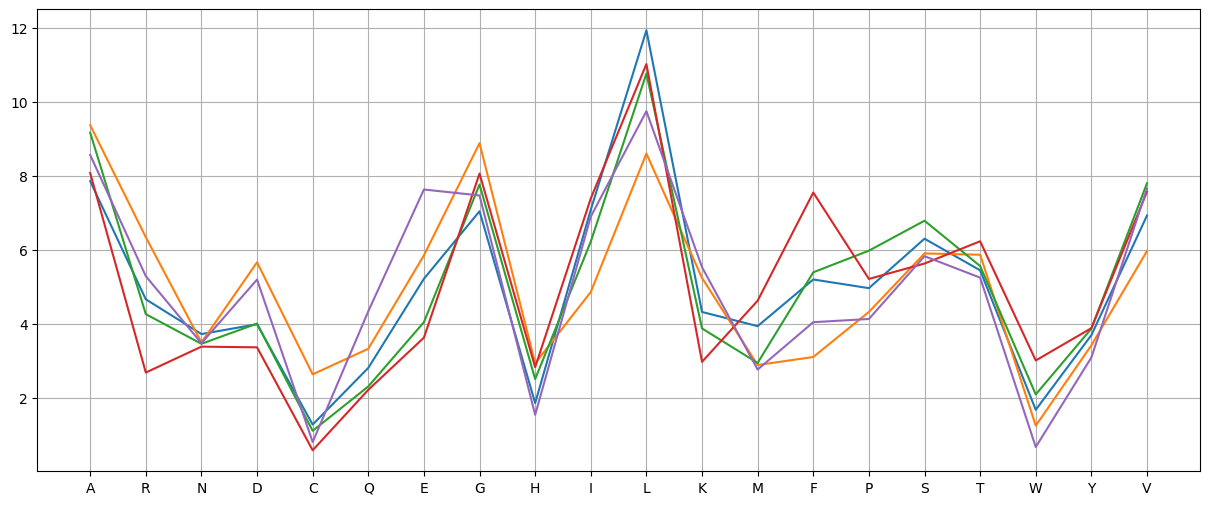

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15,6))
plt.xticks(ticks=range(0,20),labels=aa)
plt.plot(percent_aa(df_com_cp1).values())
plt.plot(percent_aa(df_com_cp2).values())
plt.plot(percent_aa(df_com_cp3).values())
plt.plot(percent_aa(df_com_cp4).values())
plt.plot(percent_aa(df_com_cp5).values())
plt.grid()
plt.show()